# `SC - LAB- WEEK-2` - `K-means clustering`

# `Name`   : `Shashikantha`

# `Roll No` : `181IT242`

In [24]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import collections
import seaborn as sn
import csv

In [16]:
class K_means:
    def __init__(self,k):
        self.K = k
    def get_euclidean_distance(self,A_matrix, B_matrix):
        A_square = np.reshape(np.sum(A_matrix * A_matrix, axis=1), (A_matrix.shape[0], 1))
        B_square = np.reshape(np.sum(B_matrix * B_matrix, axis=1), (1, B_matrix.shape[0]))
        AB = A_matrix @ B_matrix.T
        C = -2 * AB + B_square + A_square
        return np.sqrt(C);
    def get_initial_centroids(self,X):
        number_of_samples = X.shape[0]
        sample_points_ids = random.sample(range(0, number_of_samples), self.K)

        centroids = [tuple(X[id]) for id in sample_points_ids]
        unique_centroids = list(set(centroids))

        number_of_unique_centroids = len(unique_centroids)

        while number_of_unique_centroids < self.K:
            new_sample_points_ids = random.sample(range(0, number_of_samples), self.K- number_of_unique_centroids)
            new_centroids = [tuple(X[id]) for id in new_sample_points_ids]
            unique_centroids = list(set(unique_centroids + new_centroids))

            number_of_unique_centroids = len(unique_centroids)

        return np.array(unique_centroids)

    def get_clusters(self,X, centroids):

        k = self.K

        clusters = {}
        clusters_ind = {}
        distance_matrix = self.get_euclidean_distance(X, centroids)

        closest_cluster_ids = np.argmin(distance_matrix, axis=1)

        for i in range(k):
            clusters[i] = []
            clusters_ind[i] = []

        for i, cluster_id in enumerate(closest_cluster_ids):
            clusters[cluster_id].append(X[i])
            clusters_ind[cluster_id].append(i)
        return clusters,clusters_ind
    
    
    def has_centroids_covered(self,previous_centroids, new_centroids, movement_threshold_delta):

        distances_between_old_and_new_centroids = self.get_euclidean_distance(previous_centroids, new_centroids)
        centroids_covered = np.max(distances_between_old_and_new_centroids.diagonal()) <= movement_threshold_delta

        return centroids_covered
    

    def perform_k_means_algorithm(self,X, movement_threshold_delta=0):

        new_centroids = self.get_initial_centroids(X=X)

        centroids_covered = False
        count = 0
        while not centroids_covered:
            previous_centroids = new_centroids
            clusters,_ = self.get_clusters(X, previous_centroids)

            new_centroids = np.array([np.mean(clusters[key], axis=0, dtype=X.dtype) for key in sorted(clusters.keys())])
            count += 1
            centroids_covered = self.has_centroids_covered(previous_centroids, new_centroids, movement_threshold_delta)
        return new_centroids
    
    def fit(self,X):
        centroids = self.perform_k_means_algorithm(X, movement_threshold_delta=1/10000)
        clusters,cluster_ind = self.get_clusters(X, centroids)
        return clusters,cluster_ind



In [17]:
def get_label(cluster):
    Y_label = [Y[i] for i in cluster]
    data = collections.Counter(Y_label)
    return data.most_common(1)[0][0]


def predict(cluster,k):
    Y_predict = ['' for i in range(len(Y))]
    for i in range(k):
        label = get_label(cluster[i])
        for ind in cluster[i]:
            Y_predict[ind] = label
    return Y_predict

def one_hot_encode(Y_):
    Y_encoded  = [None for i in range(len(Y_))]
    unique = { val:i for i,val in enumerate(np.unique(Y_))} 
    runique = { i:val for i,val in enumerate(np.unique(Y_))} 
    for i in range(len(Y_)):
        Y_encoded[i] = unique[Y_[i]]
    return Y_encoded,runique

def compute_confusion_matrix(true, pred):
    K = len(np.unique(true))
    true,label_true = one_hot_encode(true)
    pred,label_pred = one_hot_encode(pred)
    result = np.zeros((K, K))
    for i in range(len(true)):
        result[true[i]][pred[i]] += 1
    return result,label_true

def classification_report(cm):
    true_pos = cm[0][0]
    true_neg = cm[1][1]
    false_pos = cm[1][0]
    false_neg = cm[0][1]
    print("True Positive : ",true_pos)
    print("True Negative : ",true_neg)
    print("False Positive : ",false_pos)
    print("False Negative : ",false_neg)
    print("Hit Ratio : ",true_pos/(true_pos+false_neg))
    print("False Alarm rate : ",false_pos/(false_pos+true_neg))
    accuracy = 0
    total = np.sum(cm)
    diagonal = np.sum(np.diag(cm))
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    recall_ = true_pos/(true_pos+false_neg)
    precision_ = true_pos/(false_pos+true_pos)
    print("Recall : =>  ",recall_)
    print("Precision : =>  ",precision_)
    f1_score = (2*precision_*recall_)/(precision_+recall_)
    print("F1-score : => ",f1_score)
    print("Accuracy : => ",(diagonal/total)*100)
    
    
def classification_report2(cm,label):
    print("\n")
    accuracy = 0
    total = np.sum(cm)
    diagonal = np.sum(np.diag(cm))
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    for i in range(len(precision)):
        print("Precision ("+label[i]+") :: ===>", precision[i])
        print("Recall  ("+label[i]+")   :: ===>", recall[i])
        print("\n")
    recall_ = np.mean(recall)
    precision_ = np.mean(precision)
    print("Recall(avg) OR hit ratio(avg):: ====>  ",recall_)
    print("Precision(avg)               :: ====>  ",precision_)
    f1_score = (2*precision_*recall_)/(precision_+recall_)
    print("F1-score                     :: ====> ",f1_score)
    print("Accuracy                     :: ====> ",(diagonal/total)*100)

# IRIS DATASET

In [32]:
data = pd.read_csv('iris.data',header=None)
X_array = data.to_numpy()
X_ = X_array[:,:-1]
Y = X_array[:,-1]
X = np.array(X_, dtype = np.float)
data.head()


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [144]:
k_means = None
k_means = K_means(3)
clusters,cluster_ind = k_means.fit(X)

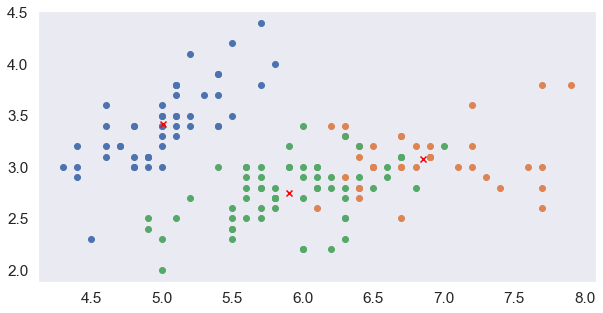

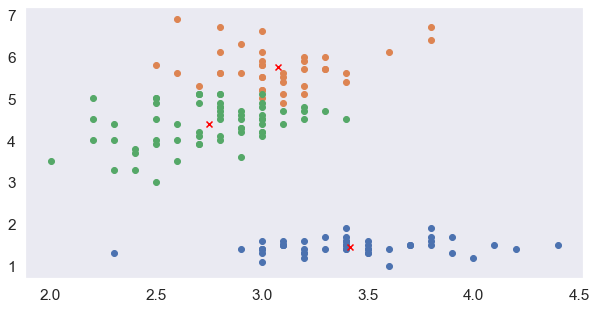

In [145]:
plt.rcParams['figure.figsize'] = [10, 5]
for centroid, points in clusters.items():
    points = np.array(points)
    centroid = np.mean(points, axis=0)
    plt.scatter(points[:, 0], points[:, 1], marker='o')
    plt.grid()
    plt.scatter(centroid[0], centroid[1], marker='x', color="red")
plt.show()

for centroid, points in clusters.items():
    points = np.array(points)
    centroid = np.mean(points, axis=0)
    plt.scatter(points[:, 1], points[:, 2], marker='o')
    plt.grid()
    plt.scatter(centroid[1], centroid[2], marker='x', color="red")
plt.show()

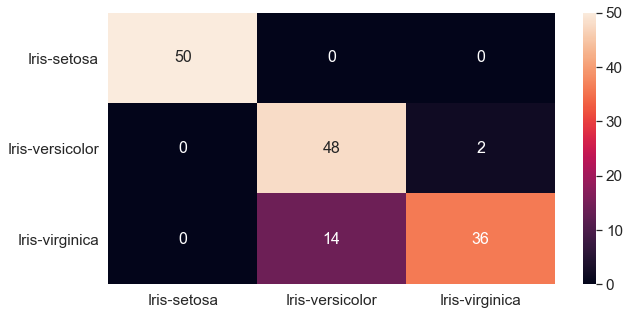



Precision (Iris-setosa) :: ===> 1.0
Recall  (Iris-setosa)   :: ===> 1.0


Precision (Iris-versicolor) :: ===> 0.7741935483870968
Recall  (Iris-versicolor)   :: ===> 0.96


Precision (Iris-virginica) :: ===> 0.9473684210526315
Recall  (Iris-virginica)   :: ===> 0.72


Recall(avg) OR hit ratio(avg):: ====>   0.8933333333333332
Precision(avg)               :: ====>   0.9071873231465761
F1-score                     :: ====>  0.9002070289253774
Accuracy                     :: ====>  89.33333333333333


In [148]:
Y_pred = predict(cluster_ind,k_means.K)
cm,label = compute_confusion_matrix(Y,Y_pred)
list_ = label.values()
df_cm = pd.DataFrame(cm,list_,list_)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()
classification_report2(cm,label)

# Training on SPECTF dataset

In [4]:
data = None
X_array = None
X_ =None
Y = None
X = None
data = pd.read_csv('SPECTF_test.csv')
X_array = data.to_numpy()
X_ = X_array[:,:-1]
Y = X_array[:,-1]
X = np.array(X_, dtype=np.float)
data.head()

,Attr_1,Attr_2,Attr_3,Attr_4,Attr_5,Attr_6,Attr_7,Attr_8,Attr_9,Attr_10,...,Attr_36,Attr_37,Attr_38,Attr_39,Attr_40,Attr_41,Attr_42,Attr_43,Attr_44,Class
0,32,41,76,34,65,53,30,54,16,51,...,43,67,61,29,31,17,8,18,11,Yes
1,76,65,60,40,32,34,65,50,53,37,...,51,65,59,43,39,35,30,24,21,Yes
2,60,51,75,60,65,45,64,55,55,61,...,68,69,63,62,53,57,31,46,30,Yes
3,64,60,71,69,71,65,66,64,68,59,...,55,66,58,65,65,75,64,61,56,Yes
4,65,69,66,76,58,67,65,72,66,64,...,64,71,70,72,69,70,65,63,61,Yes


In [5]:
k_means2 = None
k_means2 = K_means(2)
clusters,cluster_ind = k_means2.fit(X)

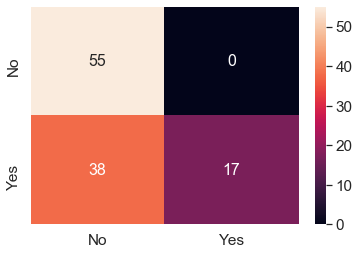

Confusion Matrix 
 [[55.  0.]
 [38. 17.]]
True Positive :  55.0
True Negative :  17.0
False Positive :  38.0
False Negative :  0.0
Hit Ratio :  1.0
False Alarm rate :  0.6909090909090909
Recall : =>   1.0
Precision : =>   0.5913978494623656
F1-score : =>  0.7432432432432433
Accuracy : =>  65.45454545454545


In [12]:
Y_pred = None
Y_pred = predict(cluster_ind,k_means2.K)
cm,label = compute_confusion_matrix(Y,Y_pred)
list_ = label.values()
df_cm = pd.DataFrame(cm,list_,list_)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()
print("Confusion Matrix \n",cm)
classification_report(cm)